In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
6.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding 
import keras #helps for ANN model construction
import tensorflow as tf #helps for ANN model construction

# Load data using pandas package
Data structure and data visualiazation


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/lab_code/mnist_train.csv')  #Load training data with the corresponding path in google drive
df2 = pd.read_csv('/content/drive/MyDrive/lab_code/mnist_test.csv')  #Load testing data with the corresponding path in google drive

In [ ]:
print (df1.shape)
print (df2.shape)

(60000, 785)
(10000, 785)


In [ ]:
X_train, y_train = df1.values[:,:-1], df1.values[:,-1:]
X_test, y_test = df2.values[:,:-1], df2.values[:,-1:]

In [ ]:
onehot = OneHotEncoder()                     #An objective for one-hot package
onehot.fit(y_train)                          #Transform labels to be the one-hot format
y_train_onehot = onehot.transform(y_train).toarray() #Transform training labels to be one-hot format
y_test_onehot = onehot.transform(y_test).toarray() #Transform testing labels to be one-hot format

Label of this image: [5]


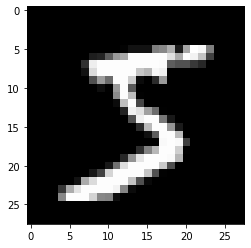

Label of this image: [0]


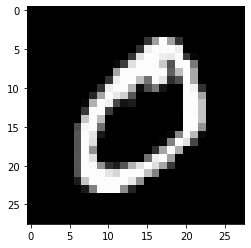

Label of this image: [3]


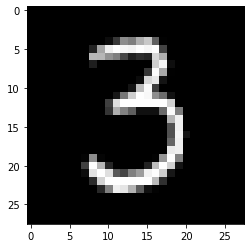

In [ ]:
#Visualization of training data
plt.imshow(X_train[0,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[0,:])
plt.show()
plt.imshow(X_train[1,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[1,:])
plt.show()
plt.imshow(X_train[50,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Label of this image:', y_train[50,:])
plt.show()

# Model training

In [ ]:
model = keras.Sequential()                         
model.add(keras.layers.Dense(1024, input_shape=(784,))) # In the first layer, we have 1024 neurons for output and 784 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(512))                       # In the second layer, we have 512 neurons for output and 1024 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(64))                       # In the second layer, we have 64 neurons for output and 512 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(10))                       # In the second layer, we have 10 neurons for output and 64 neurons for input
model.add(keras.layers.Activation("softmax"))           # softmax is used for probability estimation, which is suitable for classification tasks
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-3), 'categorical_crossentropy', metrics='acc') # compile the model with a SGD optimizer, a loss of categorical crossentropy, and a accuracy metric
model.summary()
model.fit(X_train, y_train_onehot, epochs = 50, batch_size = 1024, verbose = 2, validation_data = (X_test, y_test_onehot)) #training the model with some hyper-parameters


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

# Model testing

In [ ]:
prediction = model.predict(X_test)            # Predict the testing set
print (model.evaluate(X_test, y_test_onehot)) # Evaluation the prediction, and accuracy in the test set is 0.935

313/313 [==============================] - 2s 6ms/step - loss: 0.2670 - acc: 0.9349
[0.26699700951576233, 0.9348999857902527]


Prediction of this image: 7


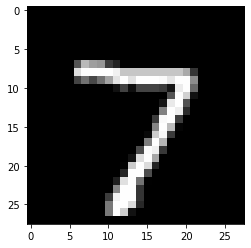

Prediction of this image: 2


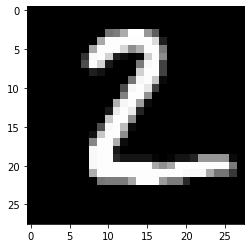

Prediction of this image: 6


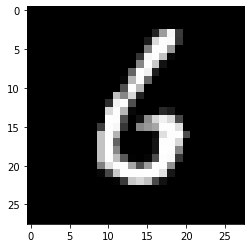

In [ ]:
#Visualization of testing data
plt.imshow(X_test[0,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[0,:]))
plt.show()
plt.imshow(X_test[1,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[1,:]))
plt.show()
plt.imshow(X_test[50,:].reshape(28,28), cmap=plt.get_cmap('gray'))
print ('Prediction of this image:', np.argmax(prediction[50,:]))
plt.show()

# Extra dropout layer

In [ ]:
model = keras.Sequential()                         
model.add(keras.layers.Dense(1024, input_shape=(784,))) # In the first layer, we have 1024 neurons for output and 784 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dropout(0.08))                   # Use for alleviating model overfitting, 0.08 is the dropout rate.
model.add(keras.layers.Dense(512))                       # In the second layer, we have 512 neurons for output and 1024 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(64))                       # In the second layer, we have 64 neurons for output and 512 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(10))                       # In the second layer, we have 10 neurons for output and 64 neurons for input
model.add(keras.layers.Activation("softmax"))           # softmax is used for probability estimation, which is suitable for classification tasks
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-3), 'categorical_crossentropy', metrics='acc') # compile the model with a SGD optimizer, a loss of categorical crossentropy, and a accuracy metric
model.summary()
model.fit(X_train, y_train_onehot, epochs = 50, batch_size = 1024, verbose = 2, validation_data = (X_test, y_test_onehot)) #training the model with some hyper-parameters

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1024)              803840    
                                                                 
 activation_56 (Activation)  (None, 1024)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_57 (Dense)            (None, 512)               524800    
                                                                 
 activation_57 (Activation)  (None, 512)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                32832     
                                                                 
 activation_58 (Activation)  (None, 64)              

In [ ]:
prediction = model.predict(X_test)            # Predict the testing set
print (model.evaluate(X_test, y_test_onehot)) # Evaluation the prediction. Evaluation loss for testing set with a dropout layer is smaller than testing set without a dropout layer. Accuracy is 0.9395, which is a bit better than previous result.

313/313 [==============================] - 1s 3ms/step - loss: 0.2386 - acc: 0.9395
[0.23856718838214874, 0.9394999742507935]
